# L.A. Crime Analysis 

**Business Problem:**
Our goal is to analyze Los Angeles’ crime dataset to determine patterns in communities that are most affected by crime and to provide our findings to police officials for crime prevention. We plan to study variables such as: history of crime in specific locations, age of individuals most and least likely to be affect by crime and crime types. Additionally, we would like to analyze the frequency of crime types to determine if there are specific times or areas in which they occur.  
  
**Motivation:**
Without the full restrictions of having firearms, one study in 2018 shows that about 14 percent of people in California own guns, which is about 4.2 million in the population of California. With the increasing rate of unemployment, there are more crimes happening. The study of this research is motivated with the idea of decreasing crimes and helping people get a better life, helping people and authorities know what are the reasons that cause crimes in Los Angeles, and how to prevent them. We also want to find out the areas in Los Angeles that have the most crimes, to prevent people getting near those places.

## 1. DATA SOURCE

### 1.1 Used Dataset

>Crime in Los Angeles Data from 2020 to Present.([This Link](https://www.kaggle.com/susant4learning/crime-in-los-angeles-data-from-2020-to-present))
>- Dataset reflects incidents of crime in City of Los Angeles dating back to 2020.
>- Data Provided by: Los Angeles Police Department.



### 1.2 Overview of Dataset

|Variables          |Definitions|
------------------- |------------------
|DR_NO       | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits|
|Date Rptd       | MM/DD/YYYY |
|DATE OCC       | MM/DD/YYYY |
|TIME OCC       | In 24 hour military time. |
|AREA       | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
|AREA NAME     | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
|Rpt Dist No      | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons.  |
|Crm Cd      | Indicates the crime committed. (Same as Crime Code 1) |
|Mocodes       | Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. |
|Vict Descent       | Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian |
|Premis Cd      | The type of structure, vehicle, or location where the crime took place. |
|Crm Cd 1       | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
|LOCATION       | Street address of crime incident rounded to the nearest hundred block to maintain anonymity. |
|Status      | Status of the case. (IC is the default) |
|LAT	      | Latitude |
|LON       | Longtitude |

## 2. IMPORT AND CLEAN DATA

### 2.1 Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display_html
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

### 2.2 Import Data
> This method downloads the file within your personal google drive.

In [2]:
%load_ext rpy2.ipython
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id='1nYsIXwThE-mVAIqt1lEIVmy5nVbMuWWB'

In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')

In [5]:
# Overview of our dataset
df.head(3)

DR_NO               Date Rptd  ...      LAT       LON
0   10304468  01/08/2020 12:00:00 AM  ...  34.0141 -118.2978
1  190101086  01/02/2020 12:00:00 AM  ...  34.0459 -118.2545
2  201220752  09/16/2020 12:00:00 AM  ...  33.9739 -118.2630

[3 rows x 28 columns]

### 2.3 Clean Data
- The classification process for the variables 'Mocodes' and 'DR_NO' would be too detailed to have practical meaning. There are also too many missing values within these columns, thus we will omit these.
- 'Date Rptd' has the same meaning as the 'Date OCC' column. The followig variables also have the same meaning: Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, and Cross Street. Thus we will omit duplciate columns and keep one for simplification. 
- The 'Premis Cd' and 'Premis Desc' columns have a small number of NA values (5 rows and 108 rows), thus we will remove these rows from the final dataset. 
- Visualization of the NA values within the 'Weapon' columns, showed these values to be randomly distributed and in a large number. Thus, we will not fill in the NA with the mode or median, we will be deleting these. 
- Changed 'Date Occ' into 'Year', 'month', 'day', and 'weekday' columns.

In [6]:
display(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

In [7]:
# Removing columns with too many missing values
del df['Mocodes']
# Date Rptd has the similar meaning with Date OCC, delete
del df['Date Rptd']
# DR_NO has no significant meaning
del df['DR_NO']
# Crm Cd 1-4 have the same meaning as Crm Cd Desc.
del df['Crm Cd 1']
del df['Crm Cd 2']
del df['Crm Cd 3']
del df['Crm Cd 4']
# Cannot find the exact definition of Cross Street and we have a location variable
del df['Cross Street']

In [8]:
# X-unknown
df['Vict Sex'].fillna('X',inplace=True)
df['Vict Descent'].fillna('X',inplace=True)

In [9]:
# Small amount of NA, just delete the row.(5 rows and 108 rows)
df = df.dropna(subset=['Premis Cd'])
df = df.dropna(subset=['Premis Desc'])

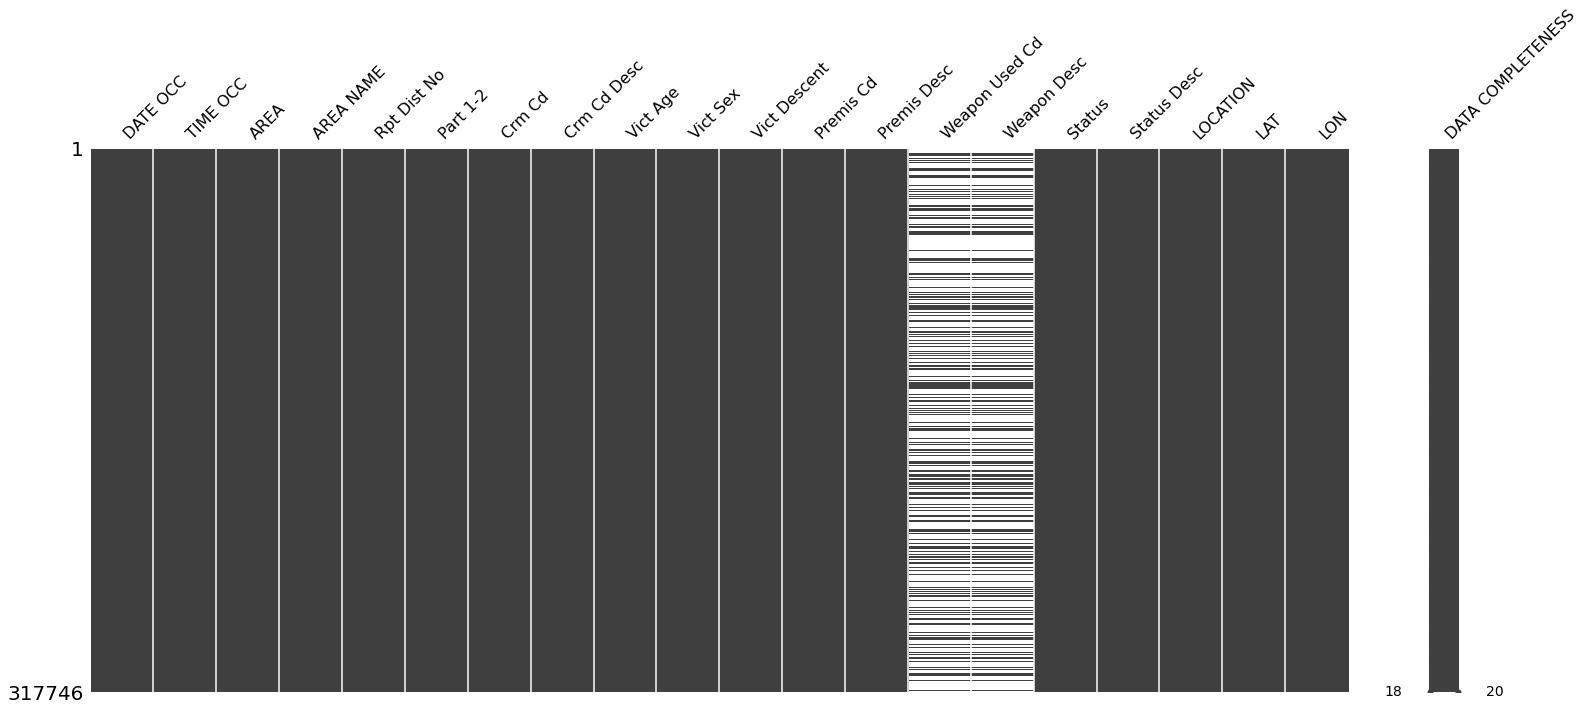

In [10]:
# Visualization of NAs in Weapon columns.
msno.matrix(df,labels=True)

In [11]:
# We can see that this missing value is relatively randomly distributed and, this is a large number, so we will not fillna with mode or median.
df = df.dropna(subset=['Weapon Used Cd'])
df = df.dropna(subset=['Weapon Desc'])

In [12]:
# Date clean up
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['YEAR OCC'] = df['DATE OCC'].dt.year
df['MONTH OCC'] = df['DATE OCC'].dt.month
df['DAY OCC'] = df['DATE OCC'].dt.day
df['WeekDAY OCC'] = df['DATE OCC'].dt.weekday

In [13]:
df.head(3)

DATE OCC  TIME OCC  AREA  ... MONTH OCC  DAY OCC  WeekDAY OCC
0 2020-01-08      2230     3  ...         1        8            2
1 2020-01-01       330     1  ...         1        1            2
5 2020-01-01        30     1  ...         1        1            2

[3 rows x 24 columns]

## 3. QUESTIONS & ANSWERS

### 3.1 Questions about Type of Crime
Brief summary of our findings regarding type analysis: 
*   Battery-Simple Assault is the most common crime type.  
*   Strong arm (body parts) is the most common weapon used. 
*   Aggravated Assault and Robbery were the crimes that used a weapon the most.
*   Child abuse (Physical) - Simple assault was the most prevalent crime type involving children.
*   Domestic violence is the most common crime type for female victims.

#### 3.1.1 Q: What are the most common crimes that occur in LA?
> A: Battery-Simple Assault is the most common crime type. 

In [14]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [15]:
Count_ = df['Crm Cd Desc'].value_counts().to_frame().head(20)
Percent_ = df['Crm Cd Desc'].value_counts(normalize=True).to_frame().head(20)
#common_crimes=display_side_by_side(Count_,Percent_)

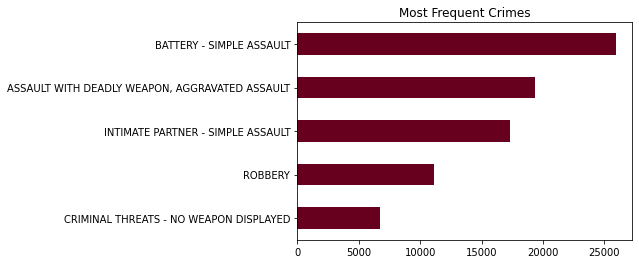

In [16]:
df['Crm Cd Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh', colormap='RdBu', title="Most Frequent Crimes")

#### 3.1.2 What are the most common weapons?
> A: Strong arm (body parts).

In [17]:
Count_ = df['Weapon Desc'].value_counts().to_frame().head(10)
Percent_ = df['Weapon Desc'].value_counts(normalize=True).to_frame().head(10)
#display_side_by_side(Count_,Percent_)

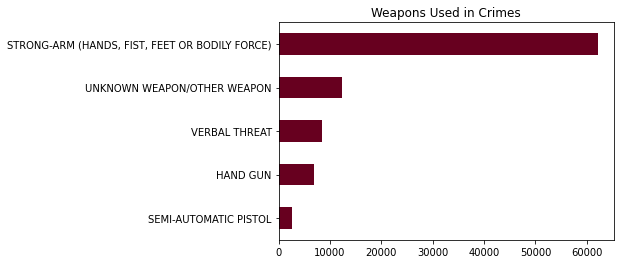

In [18]:
df['Weapon Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh', colormap='RdBu', title="Weapons Used in Crimes")

#### 3.1.3 Which crimes affiliate to the most weapons used?
> A: Aggravated Assault and Robbery were the crimes that used a weapon the most.

In [19]:
weapon_list=[102.0, 500.0, 109.0, 200.0, 106.0]
df_wp=df.copy()
weapon_float = [float(x) for x in weapon_list]
df_wp['Weapon Used Cd'].replace(weapon_float, 1, inplace=True)
df_wp['Weapon Used Cd'][df_wp['Weapon Used Cd']!=1]=0
df_wp=(df_wp.groupby('Crm Cd Desc')
    .agg({'Weapon Used Cd': 'sum'})
    .reset_index()
    .rename(columns={'Weapon Used Cd':'Count'})
 )
df_wp = df_wp.sort_values(by='Count',ascending=False)
df_wp.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Crm Cd Desc   Count
2   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  8018.0
68                                         ROBBERY  3499.0
11                                 BRANDISH WEAPON  2198.0
4                         BATTERY - SIMPLE ASSAULT  2087.0
15                                        BURGLARY  1655.0

#### 3.1.4 Where did the most common crimes using weapons occur?
> A: The most common occured on 77th Street and Southeast area

In [20]:
weapon_list=[102.0, 500.0, 109.0, 200.0, 106.0]
df_wp=df.copy()
weapon_float = [float(x) for x in weapon_list]
df_wp['Weapon Used Cd'].replace(weapon_float, 1, inplace=True)
df_wp['Weapon Used Cd'][df_wp['Weapon Used Cd']!=1]=0
df_wp=(df_wp.groupby('AREA NAME')
    .agg({'Weapon Used Cd': 'sum'})
    .reset_index()
    .rename(columns={'Weapon Used Cd':'Count'})
 )
df_wp = df_wp.sort_values(by='Count',ascending=False)
df_wp.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AREA NAME   Count
0   77th Street  2846.0
14    Southeast  2599.0
1       Central  2045.0
9        Newton  1821.0
6     Hollywood  1752.0

#### 3.1.5 which type of crime occurs most often when the victim is a child?
> A: Child abuse (Physical) - Simple assault wass the most prevalent type of crime involving children.


In [21]:
child=df[np.logical_and(df['Vict Age']<=13, df['Vict Age']>=2)]
chidata = pd.DataFrame(child['Crm Cd Desc'].value_counts(normalize=True))
chidata.rename(columns={'index':'Crime Description','Crm Cd Desc':'Percent'},inplace=True)
chidata.head(5)

Percent
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT             0.295436
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 Y...  0.165145
BATTERY - SIMPLE ASSAULT                            0.116598
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      0.083402
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT         0.041079

#### 3.1.6 Which crime occurs most when the victim is female?
> A: Domestic violence is the most common type of crime.

In [22]:
female=df[df['Vict Sex']=='F']
fdata = pd.DataFrame(female['Crm Cd Desc'].value_counts(normalize=True))
fdata.rename(columns={'index':'Crime Description','Crm Cd Desc':'Percent'},inplace=True)
fdata.head(5)

Percent
INTIMATE PARTNER - SIMPLE ASSAULT               0.244307
BATTERY - SIMPLE ASSAULT                        0.228882
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  0.095878
INTIMATE PARTNER - AGGRAVATED ASSAULT           0.067507
CRIMINAL THREATS - NO WEAPON DISPLAYED          0.064839

### 3.2 Questions about Date and Time
Brief summary of our findings regarding date analysis: 
*   Crimes are more likely to occur in the summer. 
*   More serious (violent) crimes occur more frequently in the summer than in winter, spring and autumn. These crimes include rape and sexual assault, robbery and serious injuries.
*   Weekend have higher crime rates than weekdays.
*   Most crimes occur during the night between 6 p.m. and 12 a.m.

#### 3.2.1 Q: Which month has the highest number of crimes?
> A: The histogram shows the number of crimes in each month in 2020. The data from 2021 were excluded because 2021 is not over, we could not get the data for the whole year. From the graph, the number of crimes in each month seems no big difference. April has lowest crimes wich is 5352, and August is highest which has 6619 cases. Additionally, crime will happen more frequently between May and October, crimes are more likely to appear in Summer.

In [23]:
# 'DATE OCC' as index
df_date = df.set_index(df['DATE OCC'])

MONTH OCC
1     11930
2     11255
3     11285
4     11053
5     12142
6     12366
7     13120
8      9760
9      6087
10     6254
11     5611
12     5569
Name: COUNT, dtype: int64

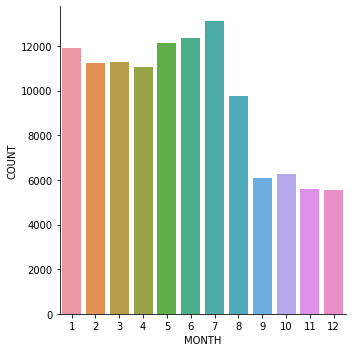

In [24]:
month_crimes = df.groupby('MONTH OCC')['DATE OCC'].count()
month_crimes = pd.DataFrame(month_crimes)
month_crimes.rename(columns = {'DATE OCC':'COUNT'}, inplace = True)
month_crimes['MONTH'] = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.catplot(x="MONTH", y="COUNT", kind="bar", data=month_crimes);
month_crimes["COUNT"]


#### 3.2.2 Is crime seasonal?

>A: For all types of crime, it seems not relevant with seasons. Let try some specific type of crime. 

> Base on the graphs above, we can see it depends on type of crimes. Vehicle attemp stolen crime is more serious in summer, but rape has nothing to do with the season. Most types of crime have the highest probability of occurring in the summer. But you may be surprised at which types of crime are "summer crimes" and which crimes are most common in other seasons — or at all irrelevant to the season.

>Serious violent crimes are significantly higher in summer than in winter, spring and autumn. This includes rape and sexual assault, robbery and serious injuries.

>If summer is the most dangerous season, you might think that spring is the second dangerous season. In this case it's not. Most crimes are more likely to occur in autumn than in spring, and crime rates in spring are similar to winter in many ways. In fact, in some cases, spring is the safest season of the year. For example, your car is less likely to be stolen in the spring than in any other season.

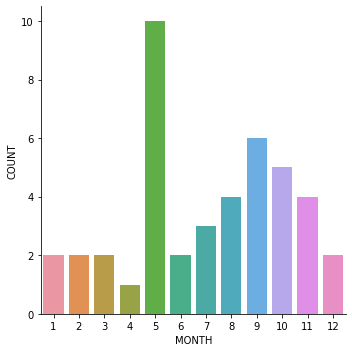

In [25]:
# vehicle attemp stolen (seasonal)
df1 = df[(df['Crm Cd Desc'] == 'VEHICLE - ATTEMPT STOLEN') & (df['YEAR OCC'] == 2020)]
#df1.head()
df_date1 = df1.set_index(df1['DATE OCC'])
month_crimes1 = df1.groupby('MONTH OCC')['DATE OCC'].count()
month_crimes1 = pd.DataFrame(month_crimes1)
month_crimes1.rename(columns = {'DATE OCC':'COUNT'}, inplace = True)
month_crimes1['MONTH'] = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.catplot(x="MONTH", y="COUNT", kind="bar", data=month_crimes1);
#month_crimes1["COUNT"]

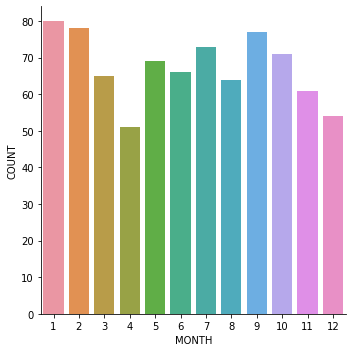

In [26]:
# Rape (not seasonal)
df2 = df[(df['Crm Cd Desc'] == 'RAPE, FORCIBLE') & (df['YEAR OCC'] == 2020)]
#df2.head()
df_date2 = df2.set_index(df2['DATE OCC'])
month_crimes2 = df2.groupby('MONTH OCC')['DATE OCC'].count()
month_crimes2 = pd.DataFrame(month_crimes2)
month_crimes2.rename(columns = {'DATE OCC':'COUNT'}, inplace = True)
month_crimes2['MONTH'] = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.catplot(x="MONTH", y="COUNT", kind="bar", data=month_crimes2);
#month_crimes2["COUNT"]

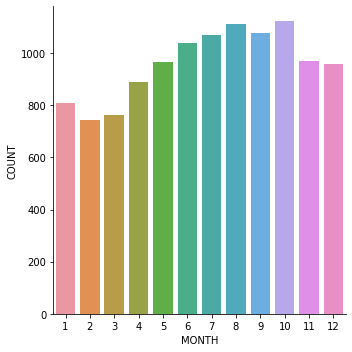

In [27]:
# Deadly weapons (seasonal)
df3 = df[(df['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT') & (df['YEAR OCC'] == 2020)]
#df3.head()
df_date3 = df3.set_index(df3['DATE OCC'])
month_crimes3 = df3.groupby('MONTH OCC')['DATE OCC'].count()
month_crimes3 = pd.DataFrame(month_crimes3)
month_crimes3.rename(columns = {'DATE OCC':'COUNT'}, inplace = True)
month_crimes3['MONTH'] = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.catplot(x="MONTH", y="COUNT", kind="bar", data=month_crimes3);
#month_crimes3["COUNT"]

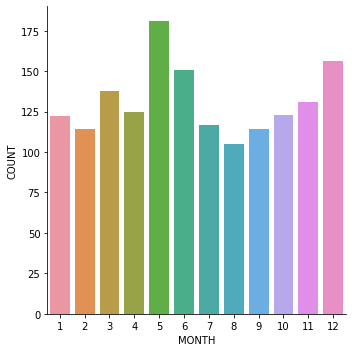

In [28]:
# burglary
df4 = df[(df['Crm Cd Desc'] == 'BURGLARY') & (df['YEAR OCC'] == 2020)]
#df4.head()
df_date4 = df4.set_index(df4['DATE OCC'])
month_crimes4 = df4.groupby('MONTH OCC')['DATE OCC'].count()
month_crimes4 = pd.DataFrame(month_crimes4)
month_crimes4.rename(columns = {'DATE OCC':'COUNT'}, inplace = True)
month_crimes4['MONTH'] = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.catplot(x="MONTH", y="COUNT", kind="bar", data=month_crimes4);
#month_crimes4["COUNT"]

#### 3.2.3 Q: Which day of week has highest number of crimes? Weekend & weekday?
> A: The graph shows the number of crimes in day of the week by sex. It's obviously to see that weekend has higher chance to encounter crimes than weekday, and male is more likely to become a victim than others.

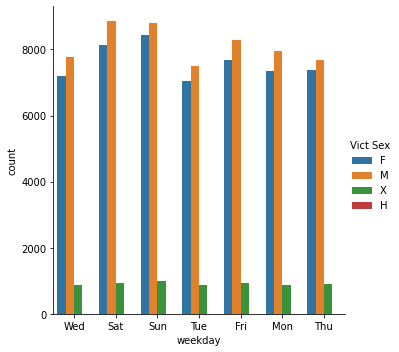

In [29]:
df_weekday = df.copy()
# Column 'weekday' added
df_weekday["weekday"] = df_weekday["DATE OCC"].dt.weekday
df_weekday.sort_values(by='weekday')

df_weekday.loc[df_weekday.weekday == 0, 'weekday'] = 'Mon'
df_weekday.loc[df_weekday.weekday == 1, 'weekday'] = 'Tue'
df_weekday.loc[df_weekday.weekday == 2, 'weekday'] = 'Wed'
df_weekday.loc[df_weekday.weekday == 3, 'weekday'] = 'Thu'
df_weekday.loc[df_weekday.weekday == 4, 'weekday'] = 'Fri'
df_weekday.loc[df_weekday.weekday == 5, 'weekday'] = 'Sat'
df_weekday.loc[df_weekday.weekday == 6, 'weekday'] = 'Sun'

sns.catplot(x="weekday", kind="count", hue='Vict Sex', data=df_weekday);
#df_weekday = df_weekday.set_index(['weekday']) 
#df_weekday.head()

#### 3.2.4 Q: The frequency of crimes by crime times.
> A: The density chart shows the distribution of number of crimes in the hour of a day. The data shows that in hour of a day, most of the crimes occurred during night between 6 p.m. and 12 a.m.

     DATE OCC  TIME OCC  AREA  ... MONTH OCC  DAY OCC  WeekDAY OCC
0  2020-01-08      22.3     3  ...         1        8            2
1  2020-01-01       3.3     1  ...         1        1            2
5  2020-01-01       0.3     1  ...         1        1            2
9  2020-09-12       0.3    18  ...         9       12            5
10 2020-01-04      22.0     1  ...         1        4            5

[5 rows x 24 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



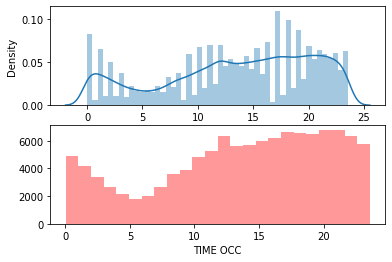

In [30]:
fig, ax = plt.subplots(2,1)
df_time = df.copy()
df_time['TIME OCC'] = df_time['TIME OCC'].div(100).round(2)
print(df_time.head())
sns.distplot(df_time['TIME OCC'], ax=ax[0]);
sns.distplot(df_time['TIME OCC'], kde=False, bins=24, color='r', ax=ax[1]);

### 3.3 Questions about Location
Brief summary of our findings regarding location analysis:  
*    Central, Southwest, and 77th Street have the most simple assault crimes.
*   The battery crimes show a clustering, with the majority of battery crimes concentrated in the downtown, which can be easily seen from the plugins map



#### 3.3.1 Q: How many crimes have happened in different neighborhoods?
> A: The chart below shows number count for crimes of "BATTERY - SIMPLE ASSAULT" that happened in different neighborhoods. And the result shows that Central, Southwest, and 77th Street have the most simple assault crimes. 



In [31]:
loc2=df[['LAT','LON','AREA NAME','Crm Cd']][df['YEAR OCC']==2020]
loc=loc2[['LAT','LON','AREA NAME']][loc2['Crm Cd']==624]
# Count crime numbers in each neighborhood
disdata = pd.DataFrame(loc['AREA NAME'].value_counts())
disdata.reset_index(inplace=True)
disdata.rename(columns={'index':'Neighborhood','AREA NAME':'Count'},inplace=True)
disdata

Neighborhood  Count
0       Central   1340
1     Southwest   1073
2   77th Street    982
3       Olympic    923
4     Southeast    906
5       Rampart    902
6     Hollywood    876
7        Newton    865
8       Pacific    753
9   N Hollywood    747
10       Harbor    740
11   Hollenbeck    731
12     Wilshire    698
13      West LA    661
14     Van Nuys    659
15      Topanga    624
16     Foothill    594
17      Mission    588
18    Northeast    549
19  West Valley    540
20   Devonshire    539

#### 3.3.2 Q: How battery-simple assault crimes seperated in lactions on map?
> A: The map shows that how many simple assualt crimes happened in the area, and when you zoom up for the area, the crimes will be more cleared shown into small area until you see where the crimes happened exactly. The dots also changed with the amount of crimes, from orange to green. Color of orange means there are many crimes happened in the area, and with the color of yellow, it means the area has some crimes, that people need to be care for. And green means there are not many crimes happened. 


In [32]:
import folium
import pandas as pd
los_map=folium.Map([34.2012,-118.4662],zoom_start=11)
#los_map

In [33]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
los_map=folium.Map([34.2012,-118.4662],zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(los_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(loc.LAT, loc.LON):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# add incidents to map
los_map.add_child(incidents)

#### 3.3.3 Q: How battery-simple assault crimes happened in the whole Los Angeles?
> A: This map is a heat map that shows how crimes for battery seperated in Los Angeles, and how safe Los Angeles is. As shown in the heat map, the crime level overall is high for Los Angeles, and it is not very safe for some areas in Los Angeles.

In [34]:
from folium.plugins import HeatMap

# let's start again with a clean copy of the map of Los Angeles
los_map=folium.Map([34.2012,-118.4662],zoom_start=11)

# Convert data format
heatdata = loc[['LAT','LON']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(los_map)

los_map

### 3.4 Questions about Victim
Brief summary of our findings regarding victim analysis:


*   Most victims are observed to be between the ages of 20-40 years old, with the average victim age being 35 years old. 
*   Minimum victim age was 0 years old and maximum victim age was 120 years old. 
*   The oldest victim died of assault from a deadline weapon (semi-automatic pistol).
*   There were 8,968 victims who were of age 0. The top 5 crimes involved for this demographic include: robbery, burglary, vandalism, discharge firearms & assualt with a deadly weapon.
*   About 48% of victims are males and 45% are female.
*  Top three ethnicities most at risk of being victims are: Hispanic, Black and White. 

#### 3.4.1 Q: What is the most frequent age of the victim？
> A: Most victims are observed to be between the ages of 20-40 years old, with the average age being 35 years old. 

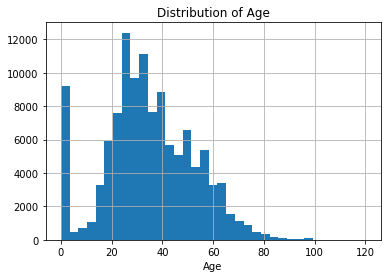

In [35]:
df.hist('Vict Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');
#Check why there is spike on age 0 

In [36]:
ave_age = df['Vict Age'].mean()
min_age = df['Vict Age'].min()
max_age = df['Vict Age'].max()
mode = df['Vict Age'].mode()

print("The average age of victims is {}.".format(round(ave_age)))
print("The minimum age of victims is {}.".format(round(min_age)))
print("The maximum age of victims is {}.".format(round(max_age)))
print("The most common age (mode) of victims is {}".format(mode))

df[df['Vict Age']==120]
print("The oldest victim died of assault with deadly weapon- semi-automatic pistol.")

#df[df['Vict Age']==0].head(3)
#There were many babies that died of crimes-- do an analysis of the types of crimes

The average age of victims is 35.
The minimum age of victims is 0.
The maximum age of victims is 120.
The most common age (mode) of victims is 0    0
dtype: int64
The oldest victim died of assault with deadly weapon- semi-automatic pistol.


#### 3.4.2 Q: What is the top 5 crimes when the victims are 0 year old?
> A: There were 8,968 victims who were of age 0. The top 5 crimes involved for this demographic include: robbery, burglary, vandalism, discharge firearms & assualt with a deadly weapon.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



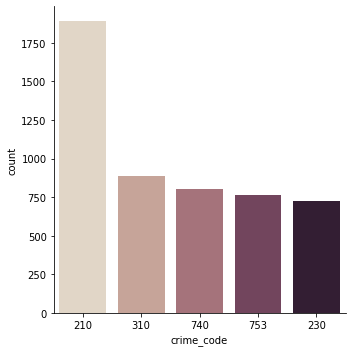

In [37]:
children = df[df['Vict Age']==0]
children.rename(columns = {'Crm Cd':'crime_code'}, inplace = True)
sns.catplot(x="crime_code", kind="count", palette="ch:.25", data=children, order=children.crime_code.value_counts().iloc[:5].index);

#### 3.4.3 Q: Distribution of Victim Sex.
> A： About 48% of victims are males and 45% are female.

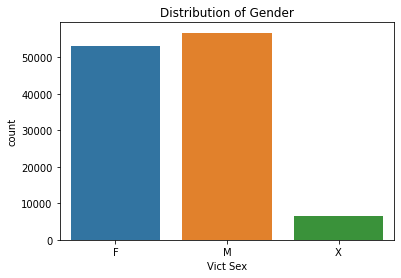

In [38]:
sns.countplot(x="Vict Sex", data=df[-(df["Vict Sex"] == "H")])
plt.title('Distribution of Gender');

F = len(df[df["Vict Sex"]=="F"])
M = len(df[df["Vict Sex"]=="M"])
X = len(df[df["Vict Sex"]=="X"])

proportion_F = (F/(F+M+X))
proportion_M = (M/(F+M+X))
proportion_X = (X/(F+M+X))

#### 3.4.4 Q: Distribution of Victim Descent.
>A: Top three ethnicities most at risk of being victims are: Hispanic, Black and White.

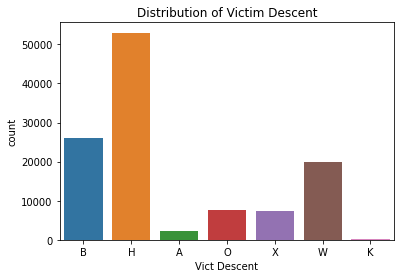

In [39]:
df_B = df[df['Vict Descent'] =='B']
df_H = df[df['Vict Descent'] =='H']
df_A = df[df['Vict Descent'] =='A']
df_O = df[df['Vict Descent'] =='O']
df_X = df[df['Vict Descent'] =='X']
df_W = df[df['Vict Descent'] =='W']
df_K = df[df['Vict Descent'] =='K']
df_descent=pd.concat([df_B, df_H, df_A, df_O, df_X, df_W, df_K], axis=0)
sns.countplot(x='Vict Descent', data=df_descent)
plt.title('Distribution of Victim Descent');

### 3.5 Questions about Machine Learning
> Our goal is to predict whether a gun will be used in the crime by analyzing historical patterns involving the crime type, crime occurence, victimology factors (age, gender and race) and whether the crime involved a gun or not. 
  
> The model: Random Forest
- Accuracy: 62%
- Sensitivity: 39.2%
- Specificity: 75.6%  
  
> Random Forest after tuning hyperparameters
- Accuracy: 62%
- Sensitivity: 39.5%
- Specificity: 75.8%  

> Random Forest after tuning hyperparameters and set cut-off value(0.15)
- Accuracy: 49%
- Sensitivity: 81.9%
- Specificity: 30%  


#### 3.5.1 Data Clean Up for Machine Learning
- Create a subset for machine learning
- Find all weapons used - including descriptions and their codes
- Replace the weapon descriptions with Gun(0 means no gun used in the crime and 1 means yes)
- Set log for Time Occ and Crm Cd
- Get dummies for categorical variables

In [40]:
# Create subset for mechine learning.
ml = df[['TIME OCC', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd']]
#ml.head(3)

In [41]:
# Find all weapon used description and their codes.
df_weapon=df[['Weapon Desc','Weapon Used Cd']]
df_weapon.drop_duplicates(subset=None, keep='first', inplace=True)
#pd.set_option("display.max_rows", None, "display.max_columns", None)  #to see the whole df_weapon
#print(df_weapon)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# create a list of crime with gun.
Gun_1=['114.0','102.0','109.0','113.0','501.0','106.0','513.0','104.0','110.0','101.0','211.0','103.0','115.0','107.0','116.0','122.0','105.0','111.0','112.0','508.0','108.0','118.0','119.0','120.0','123.0','121.0','125.0','117.0']
Gun_float = [float(x) for x in Gun_1]

In [43]:
# reset the index
ml = ml.reset_index()
del ml['index']
#ml.head(3)

In [44]:
# rename Premis Cd
ml = ml.rename(columns={'Premis Cd': 'No_Gun'})
#ml.head(3)

In [45]:
# replace Premis Cd with Gun(0 means no gun used in the crime and 1 means yes)
ml['No_Gun'].replace(Gun_float, 0, inplace=True)
ml['No_Gun'][ml['No_Gun']!=0]=1
#ml.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# set log for Time Occ and Crm Cd
ml['Time Occ Log'] = np.log2(ml['TIME OCC'])
del ml['TIME OCC']
ml['Crm Cd Log'] = np.log2(ml['Crm Cd'])
del ml['Crm Cd']
ml_original=ml

In [47]:
# Get dummies for categorical variables.
ml=pd.get_dummies(ml,drop_first=True)
#print(ml.shape)
#print(ml.head(3))

#### 3.5.2 Correlation heatmap

In [48]:
# find the correlation of every columns(include categorical)
ml_original.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

Vict Age  Vict Sex  ...  Time Occ Log  Crm Cd Log
Vict Age      1.000000 -0.148747  ...     -0.048054   -0.025343
Vict Sex     -0.148747  1.000000  ...      0.086064    0.052423
Vict Descent -0.071396  0.223114  ...      0.038654    0.047846
No_Gun       -0.040565  0.033647  ...      0.016306   -0.016421
Time Occ Log -0.048054  0.086064  ...      1.000000    0.033204
Crm Cd Log   -0.025343  0.052423  ...      0.033204    1.000000

[6 rows x 6 columns]

[Text(0.5, 0, 'Vict Age'),
 Text(1.5, 0, 'Vict Sex'),
 Text(2.5, 0, 'Vict Descent'),
 Text(3.5, 0, 'No_Gun'),
 Text(4.5, 0, 'Time Occ Log'),
 Text(5.5, 0, 'Crm Cd Log')]

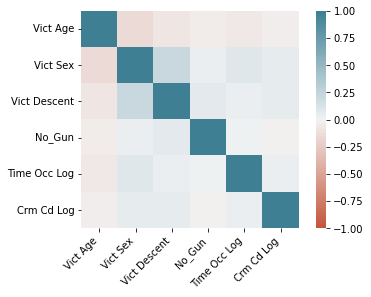

In [49]:
# create a heatmap to see the correlation.
corr = ml_original.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

#### 3.5.3 Split into train and test.

In [50]:
# Labels are the values we want to predict
labels = np.array(ml['No_Gun'])
# Remove the labels from the features(ml dataset)
features= ml.drop('No_Gun', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [51]:
# have a look at our traning set and test set
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (87324, 24)
Training Labels Shape: (87324,)
Testing Features Shape: (29108, 24)
Testing Labels Shape: (29108,)


#### 3.5.4 Training model and performance.
> We decided to choose random forest as our model and evaluate its performance.

In [52]:
# random forest model creation
rfc1 = RandomForestClassifier()
rfc1.fit(train_features, train_labels)
# predictions
rfc_predict1 = rfc1.predict(test_features)

In [53]:
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, rfc_predict1))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, rfc_predict1))

=== Confusion Matrix ===
[[13872  4410]
 [ 6553  4273]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72     18282
         1.0       0.49      0.39      0.44     10826

    accuracy                           0.62     29108
   macro avg       0.59      0.58      0.58     29108
weighted avg       0.61      0.62      0.61     29108



In [54]:
# find the sensitivity
P=sum(test_labels==1)
TP=sum((test_labels==1)&(rfc_predict1==1))
print('The sensitivity is {}%'.format(TP/P))

# find the specificity
N=sum(test_labels==0)
TN=sum((test_labels==0)&(rfc_predict1==0))
print('The specificity is {}%'.format(TN/N))

The sensitivity is 0.3946979493811195%
The specificity is 0.7587791270101739%


ROC Curve

In [55]:
score_labels1=rfc1.predict_proba(test_features)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_labels, score_labels1)
print('roc_auc_score for Random Forest: ', roc_auc_score(test_labels, score_labels1))

roc_auc_score for Random Forest:  0.617907230752127


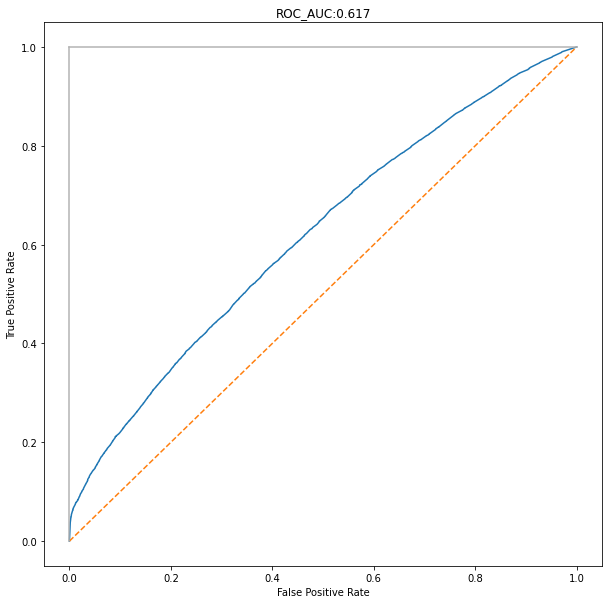

In [56]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC_AUC:0.617')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 3.5.5 Tuning hyperparameters.
*  There is too much data to run. So decided to use random 500 rows in trainset to pick the most suitable parameters.
*  Use the suitable parameters to run the whole training set.
*  The function takes too long to run, so I comment them, and the result is:
1.   'n_estimators': 400
2.   'max_features': 'sqrt'
3.   'max_depth': 180




In [57]:
# change the train set to dataframe and then random select 500 rows.
train_features_t=pd.DataFrame(train_features)
train_labels_t=pd.DataFrame(train_labels)
train_features_t= train_features_t.sample(n=500,random_state=1)
train_labels_t=train_labels_t.sample(n=500,random_state=1)

In [58]:
# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # number of features at every split

# max_features = ['auto', 'sqrt']

# # max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)
# # create random grid
# random_grid = {
#  'n_estimators': n_estimators,
#  'max_features': max_features,
#  'max_depth': max_depth
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model
# rfc_random.fit(train_features, train_labels)
# # print results
# print(rfc_random.best_params_)

Performance


*   Accuracy: 62%
*   Sensitivity: 39.5%
*   Specificity: 75.8%



In [59]:
# the same code as above
rfc2 = RandomForestClassifier(n_estimators=400, max_depth=180, max_features='sqrt')
rfc2.fit(train_features,train_labels)
rfc_predict2 = rfc2.predict(test_features)
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, rfc_predict2))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, rfc_predict2))
print('\n')



=== Confusion Matrix ===
[[13881  4401]
 [ 6545  4281]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72     18282
         1.0       0.49      0.40      0.44     10826

    accuracy                           0.62     29108
   macro avg       0.59      0.58      0.58     29108
weighted avg       0.61      0.62      0.61     29108





In [60]:
# find the sensitivity
P=sum(test_labels==1)
TP=sum((test_labels==1)&(rfc_predict2==1))
print('The sensitivity is {}%'.format(TP/P))

# find the specificity
N=sum(test_labels==0)
TN=sum((test_labels==0)&(rfc_predict2==0))
print('The specificity is {}%'.format(TN/N))

The sensitivity is 0.3954369111398485%
The specificity is 0.7592714145060715%


#### 3.5.6 Set cut-off value(threshold) as 0.15.

In [61]:
# random forest model creation
rfc3 = RandomForestClassifier(n_estimators=400, max_depth=180, max_features='sqrt')
rfc3.fit(train_features,train_labels)
# predictions using cut-off value at 0.15
threshold=0.15
rfc_predict_proba=rfc3.predict_proba(test_features)
rfc_predict3 = (rfc_predict_proba[:,1]>=threshold).astype('int')

Performance


*   Accuracy: 49%
*   Sensitivity: 81.9%
*   Specificity: 30.0%


In [62]:
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, rfc_predict3))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, rfc_predict3))
print('\n')

=== Confusion Matrix ===
[[ 5522 12760]
 [ 1970  8856]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.74      0.30      0.43     18282
         1.0       0.41      0.82      0.55     10826

    accuracy                           0.49     29108
   macro avg       0.57      0.56      0.49     29108
weighted avg       0.62      0.49      0.47     29108





In [63]:
# find the sensitivity
P=sum(test_labels==1)
TP=sum((test_labels==1)&(rfc_predict3==1))
print('The sensitivity is {}%'.format(TP/P))

# find the specificity
N=sum(test_labels==0)
TN=sum((test_labels==0)&(rfc_predict3==0))
print('The specificity is {}%'.format(TN/N))

The sensitivity is 0.8180306669129872%
The specificity is 0.3020457280385078%


ROC Curve

In [64]:
score_labels2=rfc3.predict_proba(test_features)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(test_labels, score_labels2)
print('roc_auc_score for Random Forest: ', roc_auc_score(test_labels, score_labels2))


roc_auc_score for Random Forest:  0.6186819062674987


In [65]:
print(false_positive_rate2.mean())
print(true_positive_rate2.mean())
print(false_positive_rate1.mean())
print(true_positive_rate1.mean())

0.4143485259650477
0.5381634652635846
0.37873797329790854
0.5050923830001602


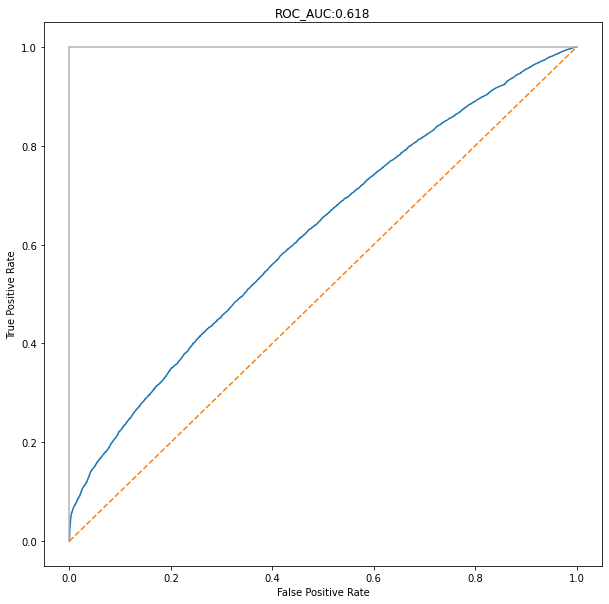

In [66]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC_AUC:0.618')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4.Summary

Our team utilized the Los Angeles (LA) crime dataset provided by the Los Angeles Police Department (LAPD) to examine the history of crimes that occurred in Los Angeles between 2020 to the present date.

Regarding the crime type, we found that 'Battery: Simple Assault' was the most frequent crime to occur, specifically accounting for 22% of the total crime types. Additionally, we observed that more serious (violent) crimes tend to occur more frequently during the summer than other seasons (winter, spring and autumn). Specifically, serious crimes include: rape, sexual assault, robbery and serious injuries. 

In terms of higher crime risk areas in LA, we focused on one crime type for our analysis: battery. Our team conducted a cluster analysis and determined that the majority of battery crimes were concentrated in the downtown area, which can be easily seen from the plugins map in our report (Section 3.4). 

An analysis of the victim's demographics demonstrate that most victims were between the ages of 20-40 years old, with the average age being 35 years old. We also found that there were 8,968 victims who were of age 0 (children). The top 5 crimes involving children of age 0 include: robbery, burglary, vandalism, discharge firearms & assualt with a deadly weapon.

Lastly, another interesting pattern we observed was that domestic violence was the main type of crime for both child victims and female victims, with their percentages being 30 and 24, respectively. 

Our recommendations to the LAPD would be to increase budget and public awareness about crimes during the summer months during high crime times (between 6 pm to 12 AM) when crime rates are seen to increase. Additionally, providing support in areas where crimes are more frequent would help increase safety within these neighborhoods.

## 5. RECOMMENDATIONS

1. Based on crime type analysis, the most crimes that use a lethal weapon occur in 
the southeast and 77th street area.  These two spots are close to 45% of most crimes committed using a lethal weapon.  In these areas, the LAPD should expect robberies and aggravated assaults to be most common with the use of a lethal weapon.  Extra training in these areas and specific tactics with these crimes can be beneficial in lowering the rate of death.

2. Based on crime time analysis, summer is the season with highest number of crimes，especially during afternoon to midnight，so increase police strength in this period of time

3. Based on crime location analysis, for police patrolling in the downtown, they can carry their own batons, shields and other defensive police weapons, as well as first aid kits, fire extinguishers and other equipment at the same time, to take precautions.

## 6. REFERENCES

A. Learned how to do heatmap about correlation based on categorical variables from this link. And the question is answered by BENY.
> https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas



B. Learnded how to split dataset into training and test set from the article called 'Random Forest in Python'. The author is Will Koehrsen.
> https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

C. Learned how to implement and improve the performance of random forest from the article called 'Implementing a Random Forest Classification Model in Python'. The author is Jake Huneycutt
> https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

D. Learned how to make real world heatmap from the nancygaooo's github called 'Folium Visualization Examples'. The author is Nan Gao
> https://github.com/nancygaooo/Visualization-Practice/blob/master/Folium%20Visualization%20Examples.ipynb